In [1]:
from qsweepy import *
from qsweepy.instruments import *
import numpy as np
from matplotlib.pyplot import *
%matplotlib qt

In [2]:
adc = TSW14J56_evm(fpga_config= True)

ADS54J40 already programmed


In [3]:
adc.set_trig_src_period(100*125) # 10 kHz period rate
adc.set_trig_src_width(2) # 80 ns trigger length

In [4]:
adc_reducer = TSW14J56_evm_reducer(adc)

In [5]:
adc.nsamp = 2048
adc.nsegm = 1

In [6]:
#adc.reset()

In [7]:
#plt.plot(np.mean(np.real(adc_reducer.measure()['Voltage']), axis=0))
#plt.show()

In [8]:
def check_stuff(demod=None):
    if demod is not None:
        adc.set_ram_data(ncov=0, data=demod)
    ramdata = np.asarray(adc.get_data_RAM(ncov=0)).T
    avg_cov_before = adc.get_cov_result_avg(ncov=0)
    adc.capture(trig='ext',cov=True)
    ddrdata = adc.get_data()
    avg_cov_after = adc.get_cov_result_avg(ncov=0)
    last_cov = adc.get_cov_result(ncov=0)
    if demod is not None:
        if not (np.sum(np.abs(demod - ramdata))==0):
            print (demod, ramdata)
        else:
            print('Ram data set test passed')
    print(ramdata)
    if last_cov != (avg_cov_after-avg_cov_before):
        print ('Last cov and avg cov test failed')
    else:
        print ('Last cov and avg cov test passed')
    print ('last_cov', last_cov)
    print ('Avg_cov_before', avg_cov_before)
    print ('Avg_cov_after', avg_cov_after)
    print ('diff', avg_cov_after-avg_cov_before)
    
    pc_cov = np.real(ddrdata)@ramdata[0,:]+np.imag(ddrdata)@ramdata[1,:]
    if last_cov != pc_cov[-1]:
        print ('Last cov and PC cov test failed')
    else:
        print ('Last cov and PC cov test passed')
    print ('last_cov', last_cov)
    print ('pc_cov', pc_cov)
    print (np.real(ddrdata))
    print (np.imag(ddrdata))

    plot(np.real(np.sum(ddrdata, axis=0)))
    plot(np.real(np.std(ddrdata, axis=0)))
    
    #adc.set_ram_data()
    #np.asarray(ramdata).T
    #ddrdata

Ram data set test passed
[[0 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]]
Last cov and avg cov test passed
last_cov -503
Avg_cov_before -943852610751234
Avg_cov_after -943852610751737
diff -503
Last cov and PC cov test passed
last_cov -503
pc_cov [-503.]
[[-643.   -5. -408. ... -407.  476. -150.]]
[[ 516. -503. -147. ...  170.   47.   27.]]


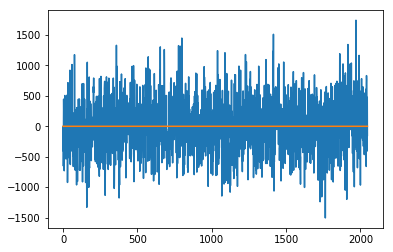

In [9]:
demod = np.zeros((2, 2048), dtype=np.int16)
demod[1,1] = 1
check_stuff(demod)

In [10]:
adc.nsegm = 256
adc.nsamp = 2048

In [4]:
adc.capture(trig=)

Write: 0x0 0x30 0x4
Write: 0x0 0x10 0x100
Write: 0x0 0x0 0x21
Read: 0x0 0x0 0x20
Done!


In [7]:
32768*2

65536

In [5]:
data = adc.get_data()

Write: 0x4 0x10 0x200
Write: 0x4 0x0 0x1


In [6]:
data

array([[-2.+0.j, -5.+0.j,  1.-3.j, ...,  0.-5.j,  3.+0.j,  1.-1.j],
       [-2.+2.j, -3.+0.j,  3.-3.j, ..., -5.+0.j,  2.-3.j, -1.-3.j],
       [ 3.-1.j, -3.-2.j,  0.-2.j, ..., -7.+0.j, -3.+3.j,  0.+0.j],
       [-2.+1.j,  2.+1.j, -3.-2.j, ...,  0.-2.j,  1.+3.j,  3.-4.j]])

In [9]:
np.reshape(data, (2, adc.nsamp*adc.nsegm))

array([[ 4, -1, -2, ...,  0,  1,  3],
       [ 0,  0, -3, ..., -2,  3, -4]], dtype=int16)

In [11]:
dataiq = np.reshape(data, (2, adc.nsamp*adc.nsegm))[0]+ 1j*np.reshape(data, (2, adc.nsamp*adc.nsegm))[1]

In [15]:
dataiqsegm = np.reshape(dataiq, (adc.nsegm, int(adc.nsamp)))

In [19]:
len(dataiqsegm[0])

2048

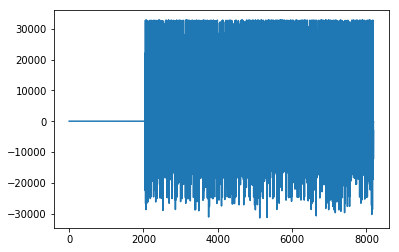

In [10]:
plt.plot(np.reshape(data, (adc.nsamp*adc.nsegm, 2)).

In [16]:
plt.plot(adc.get_data()[0][0])
plt.plot(adc.get_data()[1][0])

Write: 0x4 0x10 0x80
Write: 0x4 0x0 0x1
Write: 0x4 0x10 0x80
Write: 0x4 0x0 0x1


In [9]:
%matplotlib

Using matplotlib backend: Qt5Agg


In [1]:
import time

In [ ]:
time.sleep()